# Arase orbit -- 2024/2/26

In [1]:
import pyspedas
import pytplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plot date & mode

In [2]:
# Date
tr = ['2024-08-19', '2024-08-22']
start_time = pd.Timestamp('2024-08-20 21:30:00')
end_time   = pd.Timestamp('2024-08-20 22:00:00')

# Mode
mode_geometry = 0          # 0: SM (L, MLat, MLT)    1: GSE
"""
mode_orb = 'def'           # 0: 'def'   1: 'pre'   2: 'spre'  3: 'mpre'  4: 'lpre'
mode_orb = 'pre'           # 0: 'def'   1: 'pre'   2: 'spre'  3: 'mpre'  4: 'lpre'
mode_orb = 'spre'          # 0: 'def'   1: 'pre'   2: 'spre'  3: 'mpre'  4: 'lpre'
mode_orb = 'mpre'          # 0: 'def'   1: 'pre'   2: 'spre'  3: 'mpre'  4: 'lpre'
"""
mode_orb = 'lpre'          # 0: 'def'   1: 'pre'   2: 'spre'  3: 'mpre'  4: 'lpre'

# pyspedas.erg.orb( trange=tr )
pyspedas.erg.orb( trange=tr, datatype=mode_orb )

26-Feb-24 21:42:31: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/lpre/2024/
26-Feb-24 21:42:32: File is current: erg_data/satellite/erg/orb/lpre/2024/erg_orb_lpre_l2_20240819_v02.cdf
26-Feb-24 21:42:32: File is current: erg_data/satellite/erg/orb/lpre/2024/erg_orb_lpre_l2_20240820_v02.cdf
26-Feb-24 21:42:33: File is current: erg_data/satellite/erg/orb/lpre/2024/erg_orb_lpre_l2_20240821_v02.cdf


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 predicted orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


['erg_orb_lpre_l2_pos_llr',
 'erg_orb_lpre_l2_pos_gse',
 'erg_orb_lpre_l2_pos_gsm',
 'erg_orb_lpre_l2_pos_sm',
 'erg_orb_lpre_l2_pos_rmlatmlt',
 'erg_orb_lpre_l2_pos_eq',
 'erg_orb_lpre_l2_pos_iono_north',
 'erg_orb_lpre_l2_pos_iono_south',
 'erg_orb_lpre_l2_pos_blocal',
 'erg_orb_lpre_l2_pos_blocal_mag',
 'erg_orb_lpre_l2_pos_beq',
 'erg_orb_lpre_l2_pos_beq_mag',
 'erg_orb_lpre_l2_pos_Lm',
 'erg_orb_lpre_l2_vel_gse',
 'erg_orb_lpre_l2_vel_gsm',
 'erg_orb_lpre_l2_vel_sm',
 'erg_orb_lpre_l2_spn_num',
 'erg_orb_lpre_l2_man_prep_flag',
 'erg_orb_lpre_l2_man_on_flag',
 'erg_orb_lpre_l2_eclipse_flag']

## Geometry

In [3]:
if mode_geometry == 0:
    # L, Mlat, MLT:  rmalatmlt  -->   _x, _y, _z   -->  L, MLAT, MLT
    # SM (Solar Magnetic):  Z - magnetic pole, Y: dusk
    if mode_orb == 'def':
        pytplot.split_vec('erg_orb_l2_pos_rmlatmlt')
        L = pytplot.data_quants['erg_orb_l2_pos_rmlatmlt_x']
        MLat = pytplot.data_quants['erg_orb_l2_pos_rmlatmlt_y'] / 180 * np.pi
        MLT = pytplot.data_quants['erg_orb_l2_pos_rmlatmlt_z'] * 15 / 180 * np.pi
        x = pytplot.data_quants['erg_orb_l2_pos_sm'][:,0]
        y = pytplot.data_quants['erg_orb_l2_pos_sm'][:,1]
        z = pytplot.data_quants['erg_orb_l2_pos_sm'][:,2]
    elif mode_orb == 'pre':
        pytplot.split_vec('erg_orb_pre_l2_pos_rmlatmlt')
        L = pytplot.data_quants['erg_orb_pre_l2_pos_rmlatmlt_x']
        MLat = pytplot.data_quants['erg_orb_pre_l2_pos_rmlatmlt_y'] / 180 * np.pi
        MLT = pytplot.data_quants['erg_orb_pre_l2_pos_rmlatmlt_z'] * 15 / 180 * np.pi
        x = pytplot.data_quants['erg_orb_pre_l2_pos_sm'][:,0]
        y = pytplot.data_quants['erg_orb_pre_l2_pos_sm'][:,1]
        z = pytplot.data_quants['erg_orb_pre_l2_pos_sm'][:,2]
    elif mode_orb == 'spre':
        pytplot.split_vec('erg_orb_spre_l2_pos_rmlatmlt')
        L = pytplot.data_quants['erg_orb_spre_l2_pos_rmlatmlt_x']
        MLat = pytplot.data_quants['erg_orb_spre_l2_pos_rmlatmlt_y'] / 180 * np.pi
        MLT = pytplot.data_quants['erg_orb_spre_l2_pos_rmlatmlt_z'] * 15 / 180 * np.pi
        x = pytplot.data_quants['erg_orb_spre_l2_pos_sm'][:,0]
        y = pytplot.data_quants['erg_orb_spre_l2_pos_sm'][:,1]
        z = pytplot.data_quants['erg_orb_spre_l2_pos_sm'][:,2]
    elif mode_orb == 'mpre':
        pytplot.split_vec('erg_orb_mpre_l2_pos_rmlatmlt')
        L = pytplot.data_quants['erg_orb_mpre_l2_pos_rmlatmlt_x']
        MLat = pytplot.data_quants['erg_orb_mpre_l2_pos_rmlatmlt_y'] / 180 * np.pi
        MLT = pytplot.data_quants['erg_orb_mpre_l2_pos_rmlatmlt_z'] * 15 / 180 * np.pi
        x = pytplot.data_quants['erg_orb_mpre_l2_pos_sm'][:,0]
        y = pytplot.data_quants['erg_orb_mpre_l2_pos_sm'][:,1]
        z = pytplot.data_quants['erg_orb_mpre_l2_pos_sm'][:,2]
    elif mode_orb == 'lpre':
        pytplot.split_vec('erg_orb_lpre_l2_pos_rmlatmlt')
        L = pytplot.data_quants['erg_orb_lpre_l2_pos_rmlatmlt_x']
        MLat = pytplot.data_quants['erg_orb_lpre_l2_pos_rmlatmlt_y'] / 180 * np.pi
        MLT = pytplot.data_quants['erg_orb_lpre_l2_pos_rmlatmlt_z'] * 15 / 180 * np.pi
        x = pytplot.data_quants['erg_orb_lpre_l2_pos_sm'][:,0]
        y = pytplot.data_quants['erg_orb_lpre_l2_pos_sm'][:,1]
        z = pytplot.data_quants['erg_orb_lpre_l2_pos_sm'][:,2]

else: 
    # GSE (Geocentric solar ecliptic): X - Sun, Z - perpendicular to Earth's orbit
    if mode_orb == 'def':
        x = pytplot.data_quants['erg_orb_l2_pos_gse'][:,0]
        y = pytplot.data_quants['erg_orb_l2_pos_gse'][:,1]
        z = pytplot.data_quants['erg_orb_l2_pos_gse'][:,2]
    elif mode_orb == 'pre':
        x = pytplot.data_quants['erg_orb_pre_l2_pos_gse'][:,0]
        y = pytplot.data_quants['erg_orb_pre_l2_pos_gse'][:,1]
        z = pytplot.data_quants['erg_orb_pre_l2_pos_gse'][:,2]
    elif mode_orb == 'spre':
        x = pytplot.data_quants['erg_orb_spre_l2_pos_gse'][:,0]
        y = pytplot.data_quants['erg_orb_spre_l2_pos_gse'][:,1]
        z = pytplot.data_quants['erg_orb_spre_l2_pos_gse'][:,2]
    elif mode_orb == 'mpre':
        x = pytplot.data_quants['erg_orb_mpre_l2_pos_gse'][:,0]
        y = pytplot.data_quants['erg_orb_mpre_l2_pos_gse'][:,1]
        z = pytplot.data_quants['erg_orb_mpre_l2_pos_gse'][:,2]
    elif mode_orb == 'lpre':
        x = pytplot.data_quants['erg_orb_lpre_l2_pos_gse'][:,0]
        y = pytplot.data_quants['erg_orb_lpre_l2_pos_gse'][:,1]
        z = pytplot.data_quants['erg_orb_lpre_l2_pos_gse'][:,2]

### Event set

In [4]:
# import xarray as xr
# xarray index:  Conversion to "Datetime64"
# x['time'] = pd.to_datetime(x['time'].values)
if mode_geometry == 0:
    L_event    =    L.sel(time=slice(start_time, end_time))
    MLat_event = MLat.sel(time=slice(start_time, end_time))
    MLT_event  =  MLT.sel(time=slice(start_time, end_time))
x_event = x.sel(time=slice(start_time, end_time))
y_event = y.sel(time=slice(start_time, end_time))

## X-Y plot

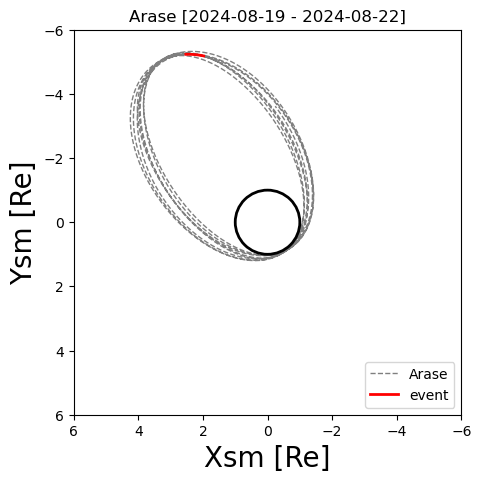

In [5]:
plt.figure(figsize=(5, 5))

# Axis
plt.xlim([6, -6]);  plt.ylim([6, -6])
if mode_geometry == 0:
    plt.xlabel('Xsm [Re]', fontsize=20);  plt.ylabel('Ysm [Re]', fontsize=20)
else:
    plt.xlabel('Xgse [Re]', fontsize=20); plt.ylabel('Ygse [Re]', fontsize=20)

# plot
plt.plot(x,       y,       linewidth=1, color='black', linestyle='--', alpha=0.5, label='Arase')
plt.plot(x_event, y_event, linewidth=2, color='red',   label='event', linestyle='-')
plt.legend(loc='lower right', fontsize=10)

# Earth
circle = plt.Circle((0, 0), 1, fill=False, color='black', linewidth=2)
plt.gca().add_patch(circle)

# Title
title_label = 'Arase [' + tr[0] + ' - ' + tr[1] + ']'
plt.title(title_label)

plt.show()

## MLT-L plot

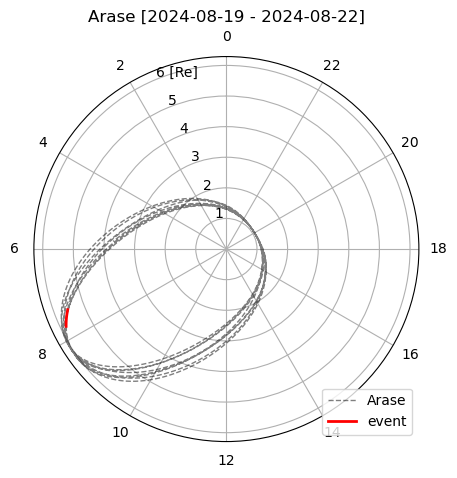

In [6]:
if mode_geometry == 0:
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='polar')

    # plot
    #ax.plot(MLT,       L*np.cos(MLat), linewidth=1, color='black', linestyle='--', alpha=0.5, label='Arase')
    #ax.plot(MLT_event, L_event*np.cos(MLat_event), linewidth=2, color='red', label='event', linestyle='-')
    ax.plot(MLT,       L,       linewidth=1, color='black', linestyle='--', alpha=0.5, label='Arase')
    ax.plot(MLT_event, L_event, linewidth=2, color='red', label='event', linestyle='-')
    plt.legend(loc='lower right', fontsize=10)

    ax.set_theta_zero_location('N')
    step = 30;  custom_angles = list(range(0, 331, step));  ax.set_xticks(np.deg2rad(custom_angles))
    custom_labels = [str(i*2) for i in range(12)];          ax.set_xticklabels(custom_labels)
    ax.set_yticks(list(range(1, 7)));                       ax.set_yticklabels(['1', '2', '3', '4', '5', '6 [Re]'], )


    # Title
    title_label = 'Arase [' + tr[0] + ' - ' + tr[1] + ']'
    plt.title(title_label)

    plt.show()